In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import nltk
from string import punctuation

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer
from nltk.sentiment import vader
from nltk.corpus import sentiwordnet as swn
from nltk.stem.lancaster import LancasterStemmer
import networkx as nx

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
target_url = "https://www.gutenberg.org/files/1342/1342-0.txt"
response = requests.get(target_url)
pnp_string = response.text
pnp_string = pnp_string.split('*** START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***')[1]
pnp_string = pnp_string.split('*** END OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***')[0]
pnp_string = pnp_string.lower()

In [4]:
stop = stopwords.words('english')
print(stop)
myStopWords = list(punctuation) + stopwords.words('english')
sia = vader.SentimentIntensityAnalyzer()
pnp_words = word_tokenize(pnp_string)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Jane Austen Data Summary:

Total Number of Novels: 4

Pride and Prejudice:
- total number of chapters: 61
- total number of words: 156,644 words


The datasets are directly from Project Gutenberg, which houses public domain novels. Therefore, I assume that the data is accurate.

For data preprocessing, I will be removing any stopwords, unneccessary characters, and make the entire text lowercase to easily process the data.

# Exploratory Data Visualization:

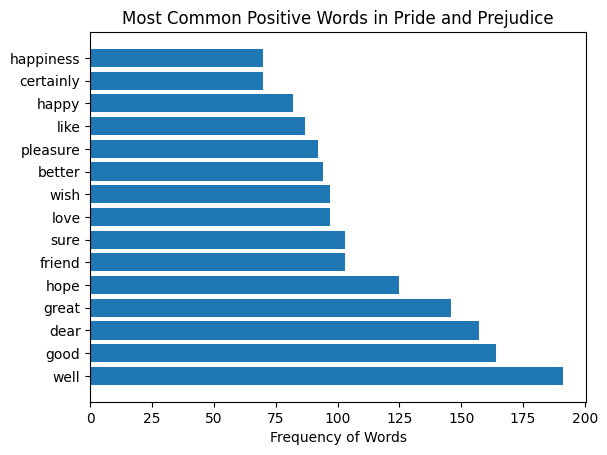

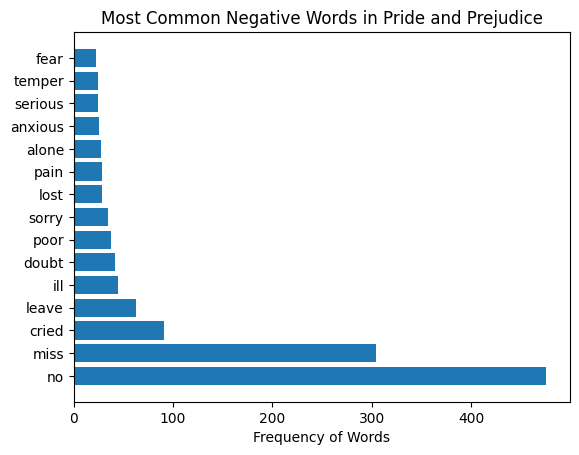

In [11]:
# 1. Positive/negative words for Pride and Prejudice:

positive_words = []
negative_words = []
neutral_words = []

for word in pnp_words:
  scores = sia.polarity_scores(word)
  if scores ['compound'] == 0:
    neutral_words.append(word)
  elif scores ['compound'] > 0:
    positive_words.append(word)
  elif scores ['compound'] < 0:
    negative_words.append(word)

pos_freq = nltk.FreqDist(positive_words)
neg_freq = nltk.FreqDist(negative_words)

most_common_positive = pos_freq.most_common(15)
most_common_negative = neg_freq.most_common(15)

plt.barh(range(len(most_common_positive)), [val[1] for val in most_common_positive])
plt.yticks(range(len(most_common_positive)), [val[0] for val in most_common_positive])
plt.xlabel('Frequency of Words')
plt.title('Most Common Positive Words in Pride and Prejudice')
plt.show()

plt.barh(range(len(most_common_negative)), [val[1] for val in most_common_negative])
plt.yticks(range(len(most_common_negative)), [val[0] for val in most_common_negative])
plt.xlabel('Frequency of Words')
plt.title('Most Common Negative Words in Pride and Prejudice')
plt.show()

[('mr.', 789), ('â\x80\x9d', 789), ('elizabeth', 602), ('could', 527), ('--', 498), ('would', 480), ('said', 406), ('darci', 377), ('mrs.', 346), ('much', 331), ('â\x80\x9ci', 322), ('bennet', 314), ('must', 310), ('miss', 308), ('one', 285), ('know', 274), ('jane', 270), ('bingley', 263), ('ladi', 256), ('sister', 247), ('think', 244), ('though', 234), ('never', 227), ('time', 219), ('see', 217), ('soon', 214), ('make', 210), ('say', 205), ('might', 204), ('may', 197), ('well', 191), ('littl', 188), ('everi', 185), ('wish', 184), ('noth', 183), ('look', 177), ('good', 174), ('without', 173), ('even', 173), ('hope', 172)]


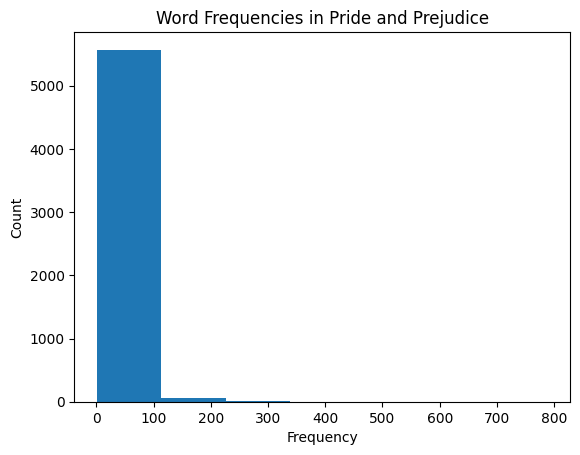

In [12]:
# 2. Word Frequency for Pride and Prejudice

pnp_words = word_tokenize(pnp_string)
myStopWords = list(punctuation) + stopwords.words('english')
wordsNoStop = []

for i in pnp_words:
    if i not in myStopWords:
        wordsNoStop.append(i)

porterstem_words = []
for w in wordsNoStop:
    porterstem_words.append(PorterStemmer().stem(w))

print(nltk.FreqDist(porterstem_words).most_common(40))

df = pd.DataFrame({'words': nltk.FreqDist(porterstem_words).keys(),
                   'frequencies': nltk.FreqDist(porterstem_words).values()}) 

df['frequencies'].plot(kind = 'hist', bins=7)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Word Frequencies in Pride and Prejudice')
plt.show()

/tmp/ipykernel_58/1166879920.py:29: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(df['Word'][:10], df['Frequency'][:10])


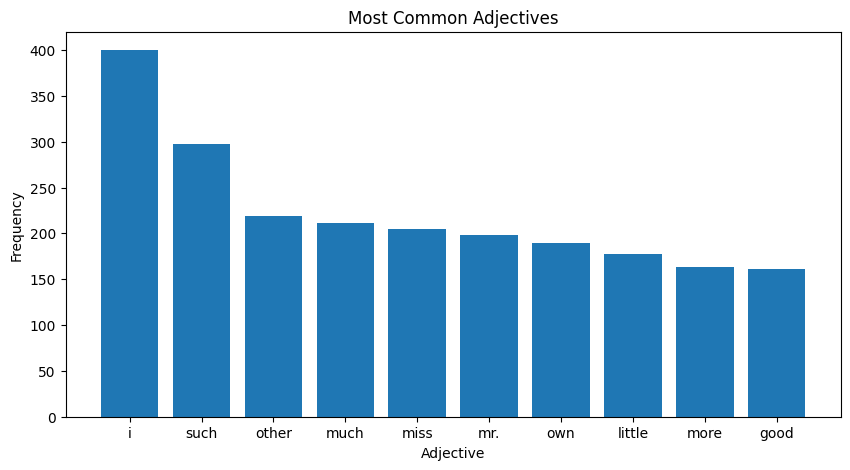

In [13]:
# 3. Most Common Adjectives

pnp_words = word_tokenize(pnp_string)

wordLancasterStems = []
for w in pnp_words:
    stemmer = LancasterStemmer()
    wordLancasterStems.append(stemmer.stem(w))

wordPorterStems = []
for w in pnp_words:
    stemmer = PorterStemmer()
    wordPorterStems.append(stemmer.stem(w))

pnp_pos = nltk.pos_tag(pnp_words)

adjectives = []
for word in pnp_pos:
    if word[1] in ['JJ', 'JJS', 'JJR']:
        adjectives.append(word[0])

pnp_freqdist = nltk.FreqDist(adjectives)

pnp_freqdist = nltk.FreqDist(adjectives)
df = pd.DataFrame(list(pnp_freqdist.items()), columns=['Word', 'Frequency'])
df = df.sort_values('Frequency', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(df['Word'][:10], df['Frequency'][:10])
plt.title('Most Common Adjectives')
plt.xlabel('Adjective')
plt.ylabel('Frequency')
plt.show()


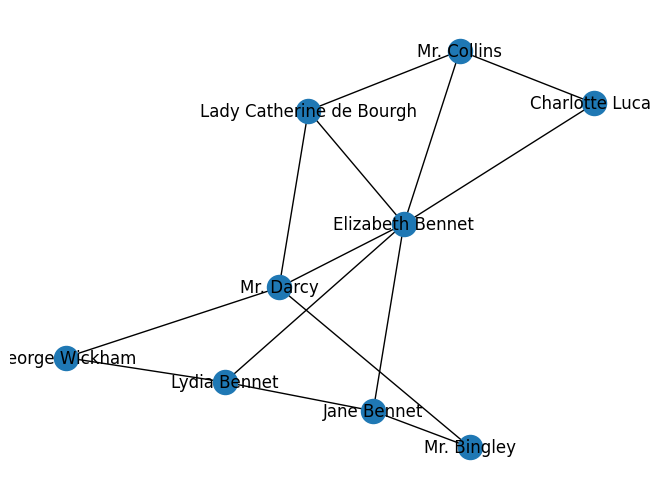

In [14]:
# 4. Character Network Visualization

G = nx.Graph()

characters = ['Mr. Darcy', 'Mr. Bingley', 'Elizabeth Bennet', 'Jane Bennet', 'George Wickham', 'Mr. Collins', 'Charlotte Lucas', 'Lydia Bennet', 'Lady Catherine de Bourgh']
G.add_nodes_from(characters)

G.add_edges_from([('Mr. Darcy', 'George Wickham'), ('Mr. Darcy', 'Elizabeth Bennet'), ('Mr. Bingley', 'Jane Bennet'), ('Mr. Bingley', 'Mr. Darcy'), ('Mr. Collins', 'Charlotte Lucas'), ('Elizabeth Bennet', 'Charlotte Lucas'), ('Lydia Bennet', 'George Wickham'), ('Mr. Collins', 'Elizabeth Bennet'), ('Lady Catherine de Bourgh', 'Mr. Collins'), ('Lady Catherine de Bourgh', 'Mr. Darcy'), ('Elizabeth Bennet', 'Lydia Bennet'), ('Jane Bennet', 'Elizabeth Bennet'), ('Jane Bennet', 'Lydia Bennet'), ('Lady Catherine de Bourgh', 'Elizabeth Bennet')])
nx.draw(G, with_labels=True)
plt.show()

# Beginnings of analysis

I made four visualizations to display word use, character networks, adjective frequency, and positive and negative words. To further prepare the data for analysis, I removed punctuation and made the text all lowercase. In text analysis, this is a popular first step that helps get rid of clutter that doesn't add any value to the research. The next step I could take would be examining the visuals to learn more about the story's characters, their motivations, and the language they use.

# Additional 4 data Visualizations I'm interested in making

1. a visualization that compares the language spoken by characters of different social classes
2. sentiment analysis of part 1 and part 2 and how the tone shifts
3. certain character interactions shift the tone of the novel, like for example, Lydia and Wickham's elopement
4. textual analysis on different romantic relationships between couples in the novel, like Darcy and Elizabeth with Mr. Collins and Elizabeth